In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
por_data = pd.read_csv('student-por.csv',sep=';')
mat_data = pd.read_csv('student-mat.csv',sep=';')

por_data['Gmean'] = por_data[['G1','G2','G3']].mean(axis=1)
mat_data['Gmean'] = mat_data[['G1','G2','G3']].mean(axis=1)

def find_difference_btw_G(df):
    difference = np.abs(df['G1']-df['G2'])
    difference += np.abs(df['G1']-df['G3'])
    difference += np.abs(df['G2']-df['G3'])
    return difference/3
por_data['Gdifference'] = find_difference_btw_G(por_data)
mat_data['Gdifference'] = find_difference_btw_G(mat_data)

por_data['Gzero'] = (por_data[['G1','G2','G3']]==0).astype(int).sum(axis=1)
mat_data['Gzero'] = (mat_data[['G1','G2','G3']]==0).astype(int).sum(axis=1)

#por_data['Gmean'] = por_data['G1']+por_data['G2']+por_data['G3']
#mat_data['Gmean'] = mat_data['G1']+mat_data['G2']+mat_data['G3']

por_data_bak = por_data.copy()
mat_data_bak = mat_data.copy()

In [3]:
# columns that record in categories data
cat_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher', 'internet', 'romantic']

# columns that record numeric data
con_cols = list(set(mat_data.columns)-set(cat_cols))

In [4]:
from sklearn.preprocessing import LabelEncoder

def categorical_transform(df):
    column_name = list(df.columns)
    labelencoder = LabelEncoder()
    for i in range(len(column_name)):
        if type(df[column_name[i]][1]) == str:
            df[column_name[i]] = labelencoder.fit_transform(df[column_name[i]])
    return df

por_data = categorical_transform(por_data)
mat_data = categorical_transform(mat_data)

### Find stuents who take both exam

In [5]:
#ren_por_data = por_data.rename(columns={'G1':'por_G1','G2':'por_G2','G3':'por_G3','Gmean':'por_Gmean'})
#ren_mat_data = mat_data.rename(columns={'G1':'mat_G1','G2':'mat_G2','G3':'mat_G3','Gmean':'mat_Gmean'})

ren_por_data = por_data_bak.rename(columns={'G1':'por_G1','G2':'por_G2','G3':'por_G3','Gmean':'por_Gmean','Gdifference':'por_Gdifference','Gzero':'por_Gzero'})
ren_mat_data = mat_data_bak.rename(columns={'G1':'mat_G1','G2':'mat_G2','G3':'mat_G3','Gmean':'mat_Gmean','Gdifference':'mat_Gdifference','Gzero':'mat_Gzero'})

bothtaken_data = pd.concat([ren_por_data,ren_mat_data])
#por_mat_data = por_mat_data.drop(columns=['G1','G2','G3'])
columns_check = ren_por_data.columns[:-6]#list(set(data.columns)-set(['G1','G2','G3']))
tmp = bothtaken_data[bothtaken_data.duplicated(subset=columns_check, keep='first')].reset_index(drop=True)
tmp2 = bothtaken_data[bothtaken_data.duplicated(subset=columns_check, keep='last')].reset_index(drop=True)

cols = ['por_G1','por_G2','por_G3','por_Gmean','por_Gdifference','por_Gzero']
tmp[cols]=tmp2[cols]
bothtaken_data=tmp

In [6]:
len(bothtaken_data)

39

**Observation:** only 39 Students taken both exams

### Data mining

Portuguese HeatMap


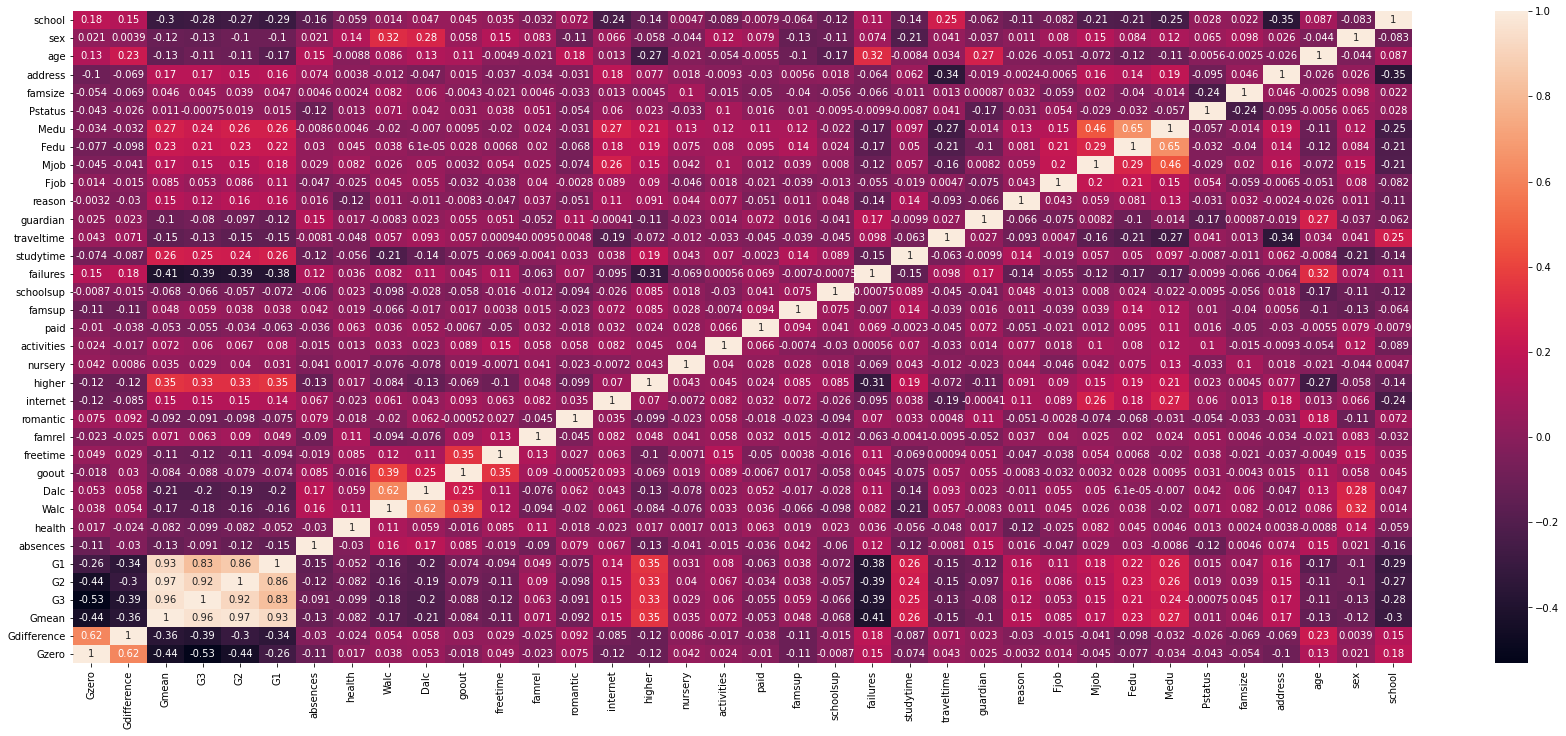

In [7]:
plt.figure(figsize=(30,12))
ax = sns.heatmap(por_data.corr(), annot=True)
ax.invert_xaxis()
print('Portuguese HeatMap')
plt.show()

Math HeatMap


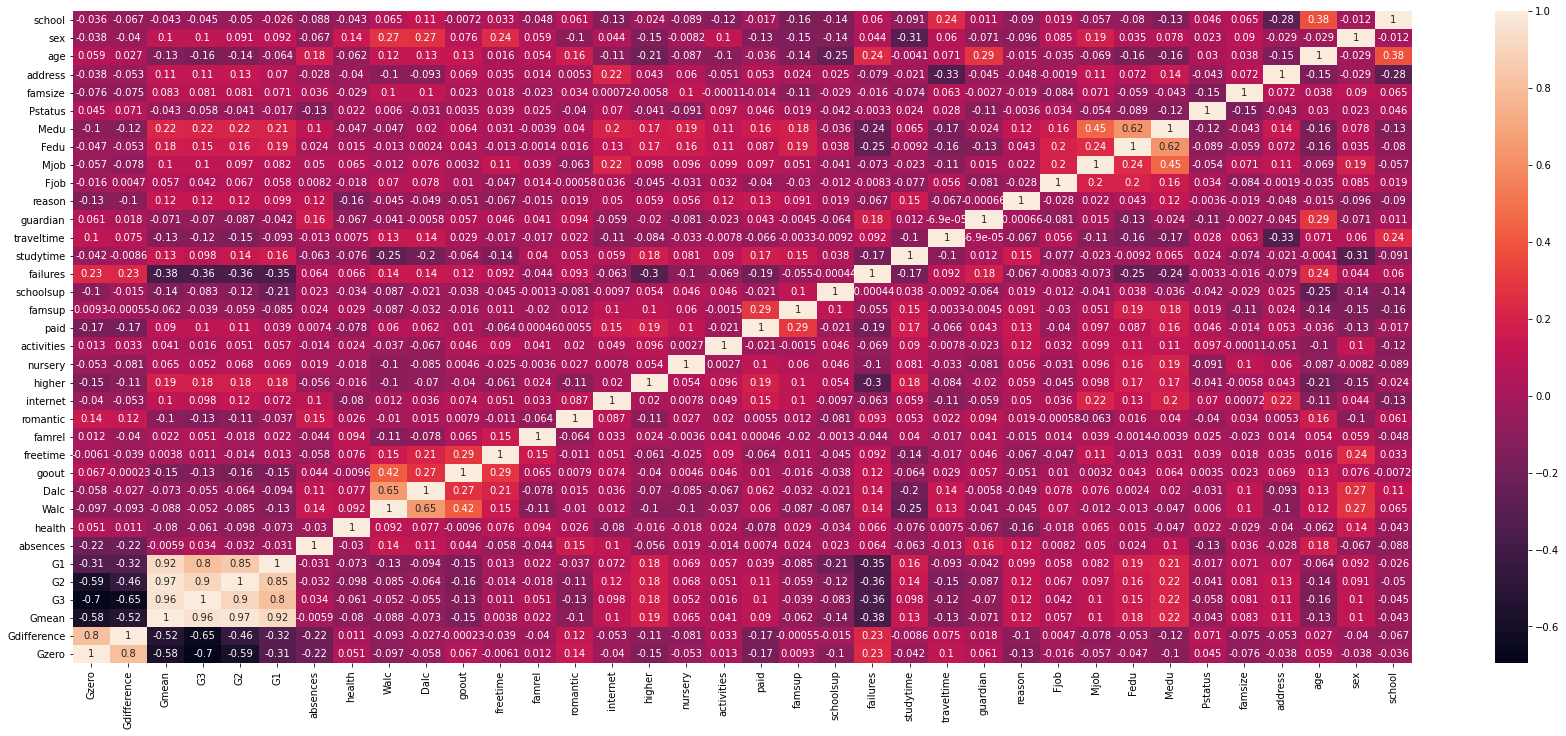

In [8]:
plt.figure(figsize=(30,12))
ax = sns.heatmap(mat_data.corr(), annot=True)
ax.invert_xaxis()
print('Math HeatMap')
plt.show()

Math HeatMap


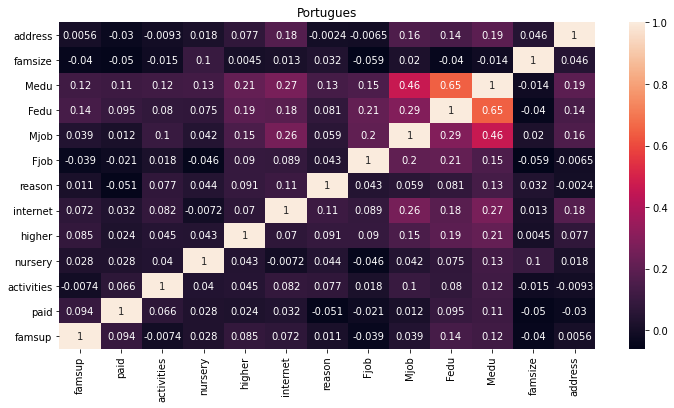

In [9]:
cols = ['address','famsize','Medu','Fedu','Mjob','Fjob','reason','internet','higher','nursery','activities','paid','famsup']

plt.figure(figsize=(12,6))
ax = sns.heatmap(por_data[cols].corr(), annot=True)
ax.set_title('Portugues')
ax.invert_xaxis()
print('Math HeatMap')
plt.show()

Math HeatMap


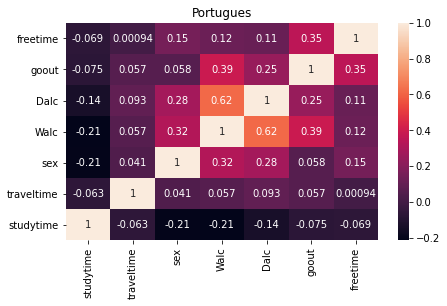

In [10]:
cols = ['freetime','goout','Dalc','Walc','sex','traveltime','studytime']
plt.figure(figsize=(7,4))
ax = sns.heatmap(por_data[cols].corr(), annot=True)
ax.set_title('Portugues')
ax.invert_xaxis()
print('Math HeatMap')
plt.show()

Math HeatMap


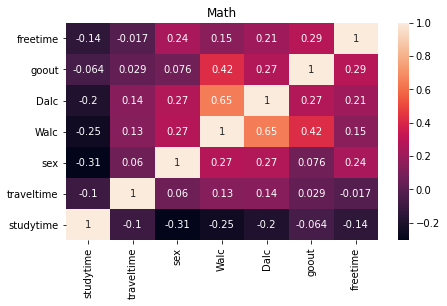

In [11]:
cols = ['freetime','goout','Dalc','Walc','sex','traveltime','studytime']
plt.figure(figsize=(7,4))
ax = sns.heatmap(mat_data[cols].corr(), annot=True)
ax.set_title('Math')
ax.invert_xaxis()
print('Math HeatMap')
plt.show()

In [12]:
len(mat_data.columns)

36

**Observation:** 
- Gdifference is highly related to Gzero -> 直接擺爛所以直接考0分
- Gdifference 越大，

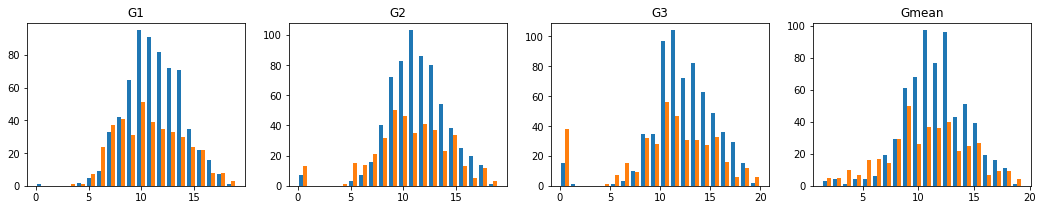

In [13]:
fig,axs = plt.subplots(ncols = 4,figsize=(18,3))
#fig.subplots_adjust(hspace=0.6)

for i in range(4):
    features = ['G1','G2','G3','Gmean']
    axs[i].set_title(features[i])
    axs[i].hist([por_data[features[i]],mat_data[features[i]]],bins=20)

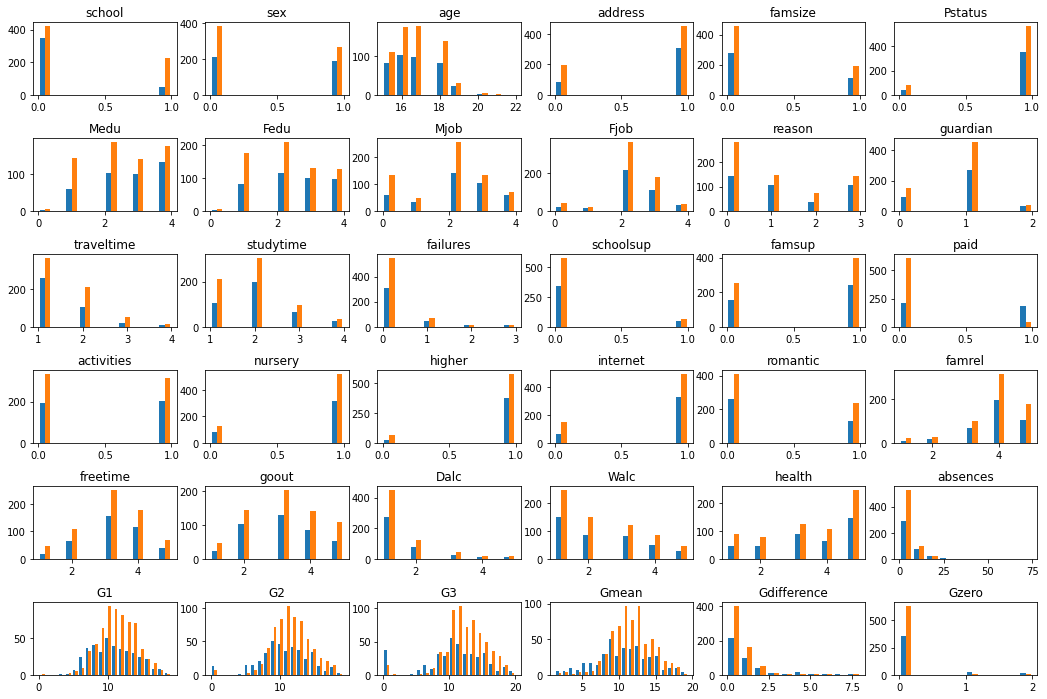

In [14]:
fig,axs = plt.subplots(6,6,figsize=(18,12))
fig.subplots_adjust(hspace=0.6)
for i in range(36):
    y=i%6
    x=int(i/6)
    feature = por_data.columns[i]
    axs[x,y].set_title(feature)
    if feature in ['G1','G2','G3','Gmean']:
        axs[x,y].hist([mat_data[feature],por_data[feature]],bins=20)
        continue
    axs[x,y].hist([mat_data[feature],por_data[feature]])
plt.show()

Portugues

Standard Dev
G1       2.743149
G2       2.911393
G3       3.228166
Gmean    2.831177
dtype: float64

Mean:
G1       11.399076
G2       11.570108
G3       11.906009
Gmean    11.625064
dtype: float64


Math

Standard Dev
G1       3.314990
G2       3.756740
G3       4.575640
Gmean    3.692103
dtype: float64

Mean:
G1       10.908861
G2       10.713924
G3       10.415190
Gmean    10.679325
dtype: float64
Histogram:
orange - Protuguese
blue - math


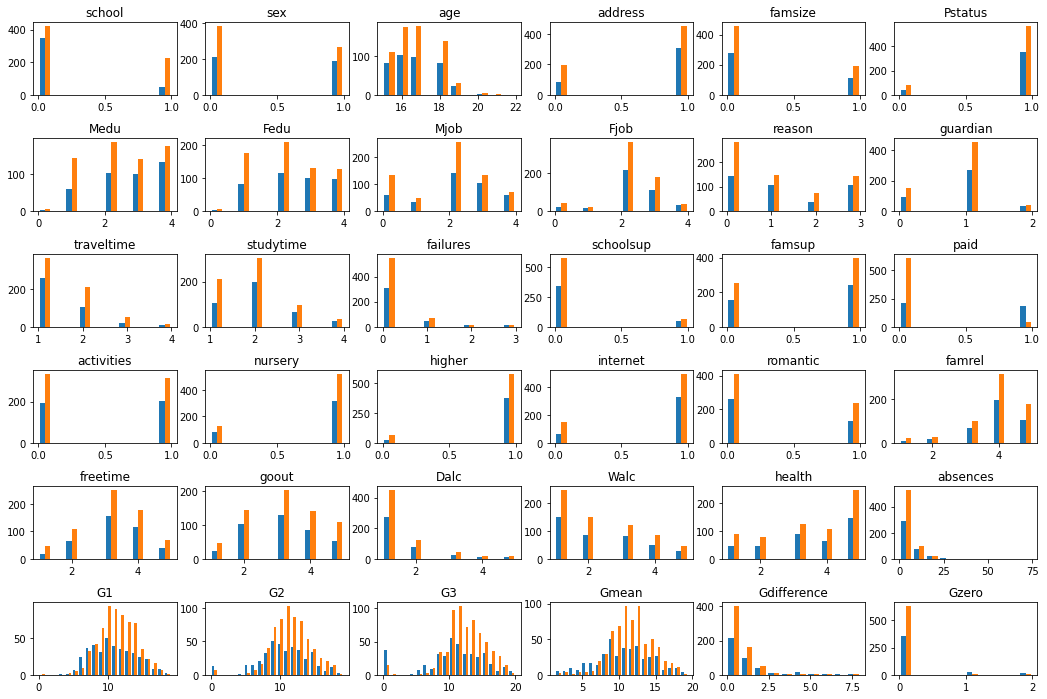

In [15]:
print('Portugues')
print('\nStandard Dev')
print(np.std(por_data[['G1','G2','G3','Gmean']]))
print('\nMean:')
print(np.mean(por_data[['G1','G2','G3','Gmean']]))
print('\n\nMath')
print('\nStandard Dev')
print(np.std(mat_data[['G1','G2','G3','Gmean']]))
print('\nMean:')
print(np.mean(mat_data[['G1','G2','G3','Gmean']]))

print('Histogram:')
print('orange - Protuguese')
print('blue - math')
#plt.figure(figsize=(32,32))
fig,axs = plt.subplots(6,6,figsize=(18,12))
fig.subplots_adjust(hspace=0.6)
for i in range(36):
    y=i%6
    x=int(i/6)
    feature = por_data.columns[i]
    axs[x,y].set_title(feature)
    if feature in ['G1','G2','G3','Gmean']:
        axs[x,y].hist([mat_data[feature],por_data[feature]],bins=20)
        continue
    axs[x,y].hist([mat_data[feature],por_data[feature]])
plt.show()

In [16]:
def hist(df,mean,std):
    #plt.figure(figsize=(32,32))
    fig,axs = plt.subplots(6,6,figsize=(18,12))
    fig.subplots_adjust(hspace=0.6)
    
    df1up = df[df['Gmean']>mean+1*std]
    df2up = df[df['Gmean']>mean+1.7*std]
    df3up = df[df['Gmean']>mean+2*std]
    df1low = df[df['Gmean']<mean-1*std]
    df2low = df[df['Gmean']<mean-1.7*std]
    df3low = df[df['Gmean']<mean-2*std]
    
    cols=[df2up,df1up,df3up,df1low,df2low,df3low]
    #cols=cols[:2]
    for i in range(36):
        y=i%6
        x=int(i/6)
        feature = df.columns[i]
        axs[x,y].set_title(feature)
        axs[x,y].hist([col[feature] for col in cols],bins=20,stacked=False)
    plt.show()

In [17]:
mean = 11.625064
std = 2.831177
print(mean+1.7*std)
print(len(por_data[por_data['Gmean']>mean+1.7*std]))

16.4380649
28


In [18]:
mean = 10.679325
std = 3.6921037
print(mean+1.7*std)
print(len(por_data[por_data['Gmean']>mean+1.7*std]))

16.95590129
26


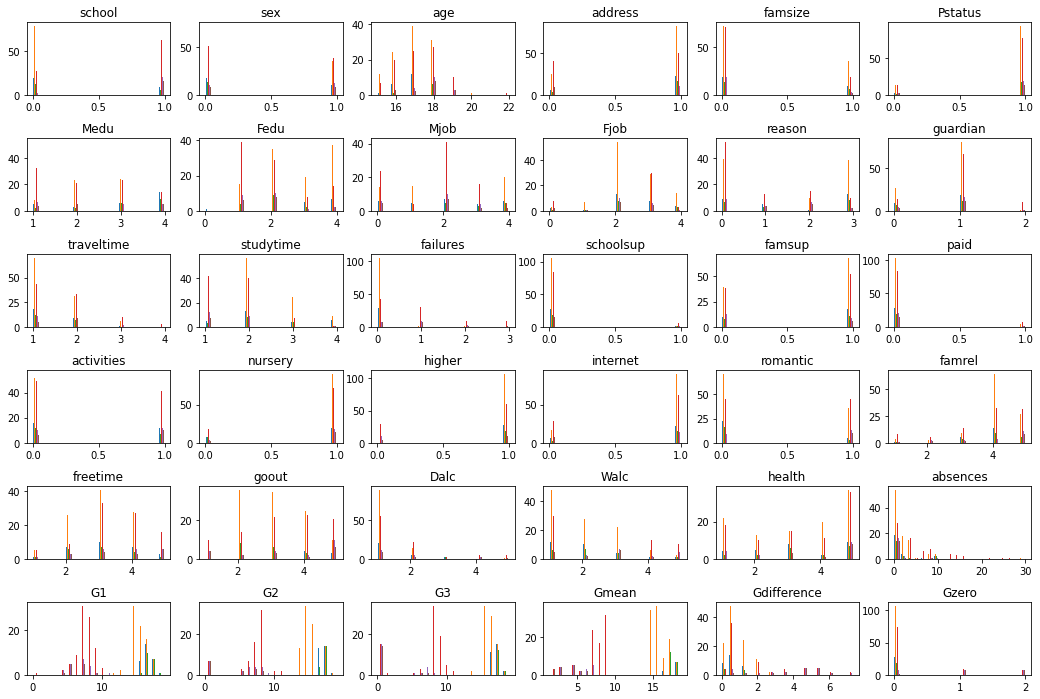

In [19]:
hist(por_data,11.625064,2.831177)

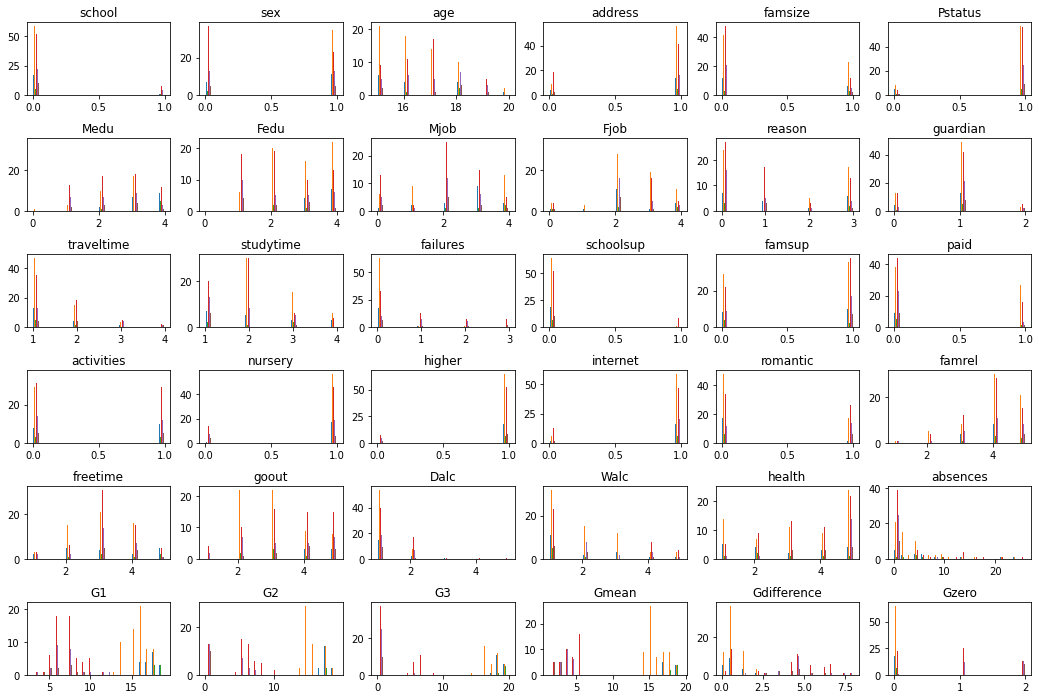

In [20]:
hist(mat_data,10.679325,3.692103)

In [21]:
def hist(df,mean,std):
    #plt.figure(figsize=(32,32))
    fig,axs = plt.subplots(6,6,figsize=(18,12))
    fig.subplots_adjust(hspace=0.6)
    
    df1up = df[df['Gmean']>mean+std]
    df2up = df[df['Gmean']>mean+1.7*std]
    df1low = df[df['Gmean']<mean-std]
    df2low = df[df['Gmean']<mean-1.7*std]
    
    cols=[df2up,df1up,df,df1low,df2low]
    cols=cols[3:]
    for i in range(36):
        y=i%6
        x=int(i/6)
        feature = df.columns[i]
        axs[x,y].set_title(feature)
        axs[x,y].hist([col[feature] for col in cols],bins=20,stacked=False)
    plt.show()

Portuguese histogram


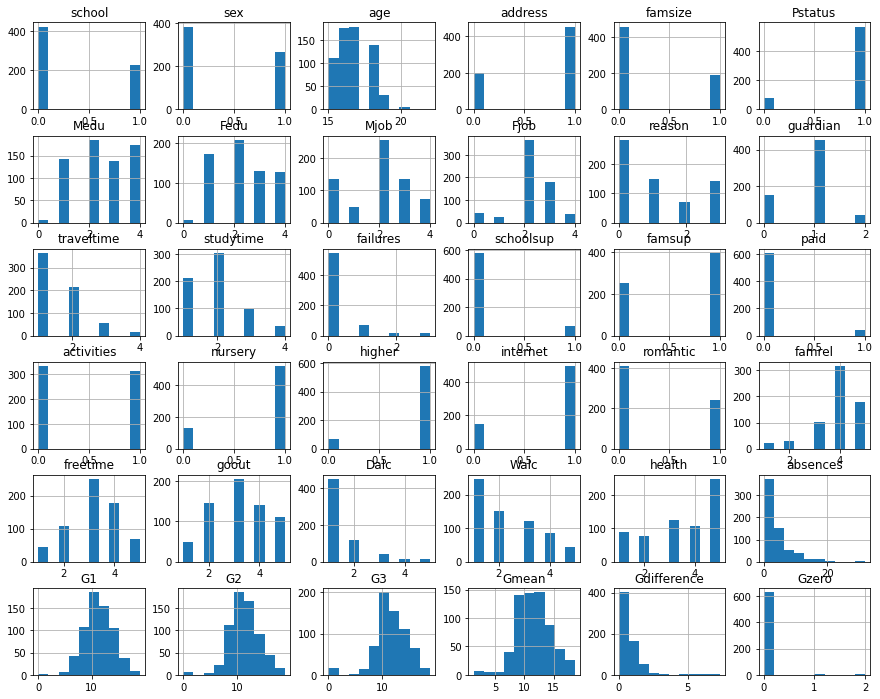

In [22]:
print('Portuguese histogram')
por_data.hist(figsize=(15,12))
plt.show()

In [23]:
len(por_data[por_data['Gmean']>11.625064+ 1.7*2.831177])

28

In [24]:
11.625064+ 1.7*2.831177

16.4380649

In [25]:
mat_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gmean', 'Gdifference',
       'Gzero'],
      dtype='object')

In [26]:
#dum_cols = ['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher', 'internet', 'romantic']
dum_cols = cat_cols

dum_ren_mat_data = pd.get_dummies(ren_mat_data,columns=dum_cols)
dum_ren_por_data = pd.get_dummies(ren_por_data,columns=dum_cols)

#mat_Gcols = ['mat_G1','mat_G2','mat_G3','mat_Gzero','mat_Gdifference','mat_Gmean']
mat_Gcols = ['mat_Gzero','mat_Gdifference','mat_Gmean']
mat_corr = dum_ren_mat_data.corr()[mat_Gcols]
#mat_corr = mat_corr.drop(mat_Gcols)
mat_corr = mat_corr.drop(mat_Gcols+['mat_G1','mat_G2','mat_G3'])

#por_Gcols = ['por_G1','por_G2','por_G3','por_Gzero','por_Gdifference','por_Gmean']
por_Gcols = ['por_Gzero','por_Gdifference','por_Gmean']
por_corr = dum_ren_por_data.corr()[por_Gcols]
por_corr = por_corr.drop(por_Gcols)

In [27]:
#tmp_por_data = categorical_transform(tmp_por_data)
#tmp_mat_data = categorical_transform(tmp_mat_data)
#mat_corr=ren_mat_data.corr()[-3:].T
#por_corr=ren_por_data.corr()[-3:].T

In [28]:
both_corr = mat_corr.copy()
#both_corr[['por_G1','por_G2','por_G3','por_Gzero','por_Gdifference','por_Gmean',]]=por_corr
both_corr[['por_Gzero','por_Gdifference','por_Gmean',]]=por_corr

In [29]:
both_corr=both_corr[np.abs(both_corr)>=0.09]

<AxesSubplot:>

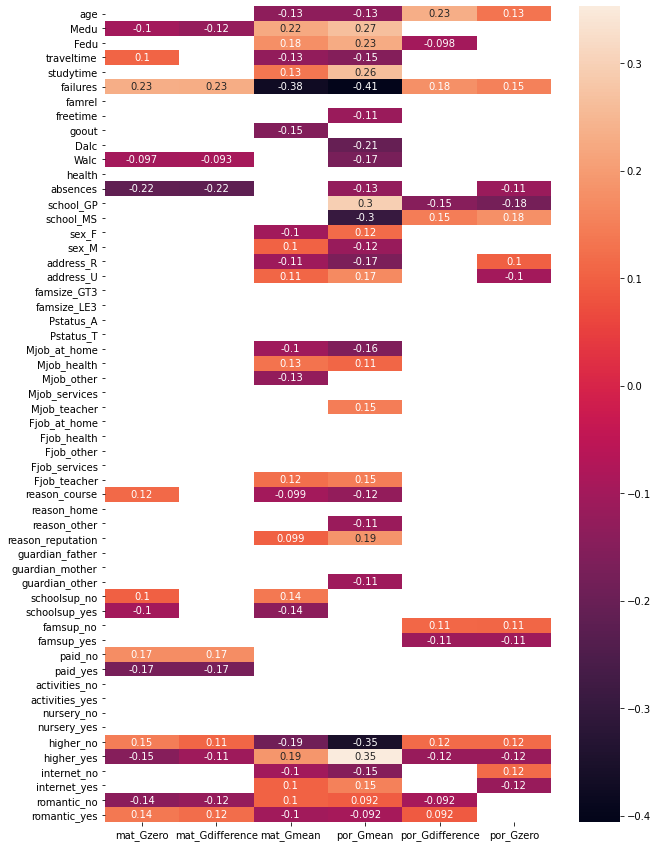

In [30]:
#both_cor = both_cor[:-3]
sequences = mat_Gcols + [x for x in reversed(por_Gcols)]
plt.figure(figsize=(10,15))
sns.heatmap(both_corr[sequences], annot=True)

### Observation between Math and Portuguese

**mentionable correrations**

these may affect Portuguese result in posivite way:
- School
- is Female
- address
- Parents' educations and jobs
- reason to choose this school
- higher education

Math have less correration compare to Portuguese in :
- school
- address
- Parents' Education especially Father
- Parents' Job
- Reason to choose their school
- study time
- wants to take higher education
- internet access at home
- alcohol

Math have more correration compare to Portugese in :
(positive)
- going out with friends
- extra paid classes within the course subject
- is male
(negative)
- extra educational support (**this is negative correration?**)



In [56]:
dum_mat_data = pd.get_dummies(mat_data, columns=cat_cols)
dum_por_data = pd.get_dummies(por_data, columns=cat_cols)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [58]:
#data_por_3 = data_por_2.copy()
#por_x = dum_por_data.drop(columns = ["G1", "G2", "G3", "Gmean"])
por_x = dum_por_data.drop(columns = ["G2","G3", "Gmean",'Gdifference','Gzero'])
#por_y = dum_por_data["Gmean"]
por_y = dum_por_data["G3"]
por_train_x, por_test_x, por_train_y, por_test_y = train_test_split(por_x, por_y, train_size = 0.8, random_state = 1039)


#mat_x = dum_mat_data.drop(columns = ["G1", "G2", "G3", "Gmean"])
mat_x = dum_mat_data.drop(columns = ["G2","G3", "Gmean",'Gdifference','Gzero'])
#mat_y = dum_mat_data["Gmean"]
mat_y = dum_mat_data["G3"]
mat_train_x, mat_test_x, mat_train_y, mat_test_y = train_test_split(mat_x, mat_y, train_size = 0.8, random_state = 1039)

In [59]:
def report(predict,actual,title=None):
    if title: print(title)
    chisquare = np.sum((np.array(predict)-np.array(actual))**2/len(predict))
    rmsd = (np.sum((np.array(predict)-np.array(actual))**2)/len(predict))**.5
    #werror = np.mean(np.abs(np.array(predict)-np.array(actual))/np.array(predict))
    #print('chi square:',chisquare)
    #print('rmsd:', rmsd)
    #print('w_error:',werror)
    plt.figure(figsize=(5,5))
    plt.scatter(actual,predict)
    plt.axline((0,0),(20,20))
    #plt.axline((0,0),(100,100))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.axis('equal')
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [60]:
def show_feature_importances(classifier,train_set):
    std = np.std([
        tree.feature_importances_ for tree in classifier.estimators_], axis=0)

    plt.figure(figsize=(16,5))
    importances_pd = pd.Series(classifier.feature_importances_,index=train_set.columns)
    importances_pd.plot.bar(yerr=std)
    #importances_pd.plot.bar()
    #fig.tight_layout()
    #plt.gca().figure.set_size(13,13)
    plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Predict with previous results

CV nmse: [5.20162885 2.76954904 2.3373625  4.1217375  2.87748835]
3.46155324682599
Protuguese
Train Result:


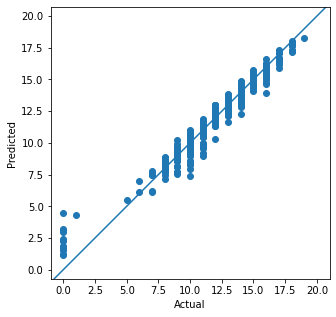

Test Result:


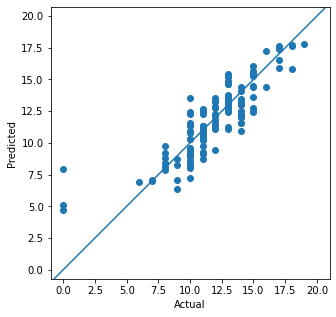

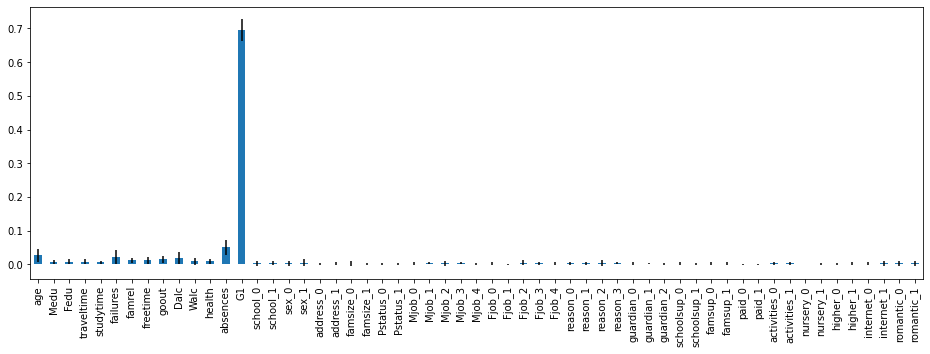

In [62]:
rdg = RandomForestRegressor()
rdg.fit(por_train_x, por_train_y)
por_predict = rdg.predict(por_test_x)

cv_results = cross_validate(rdg, por_train_x, por_train_y, cv=5, scoring = 'neg_mean_squared_error')
print('CV nmse:',-cv_results['test_score'])
print(-np.mean(cv_results['test_score']))
print('Protuguese')
report(rdg.predict(por_train_x),por_train_y,'Train Result:')
report(por_predict, por_test_y,'Test Result:')
show_feature_importances(rdg,por_train_x)

CV nmse: [6.57188906 4.74483492 9.2023619  5.12462381 5.1057127 ]
6.149884479166667
Math
Train Result:


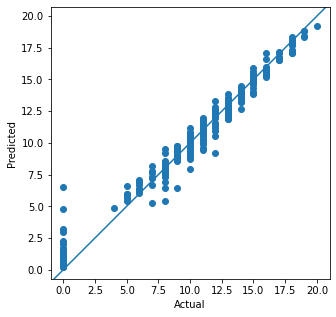

Test Result:


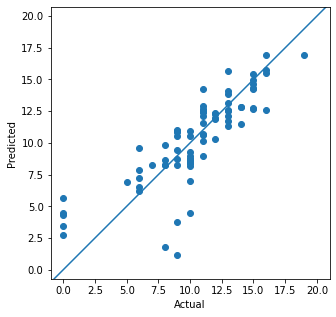

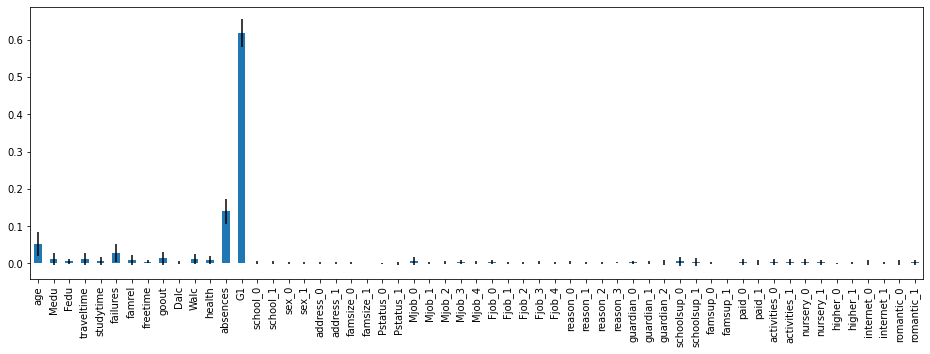

In [63]:
rdg_mat = RandomForestRegressor()
rdg_mat.fit(mat_train_x, mat_train_y)
mat_predict = rdg_mat.predict(mat_test_x)

cv_results = cross_validate(rdg_mat, mat_train_x, mat_train_y, cv=5, scoring = 'neg_mean_squared_error')
print('CV nmse:',-cv_results['test_score'])
print(-np.mean(cv_results['test_score']))
print('Math')
report(rdg_mat.predict(mat_train_x),mat_train_y,'Train Result:')
report(mat_predict, mat_test_y,'Test Result:')
show_feature_importances(rdg_mat,mat_train_x)

CV nmse: [6.23185312 4.72295714 9.48148413 5.29443968 4.98057619]
6.142262053571429
Math
Train Result:


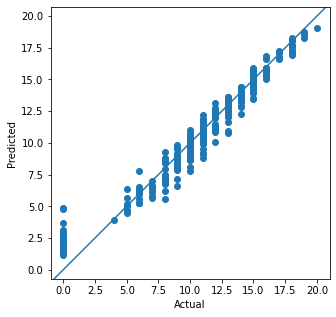

Test Result:


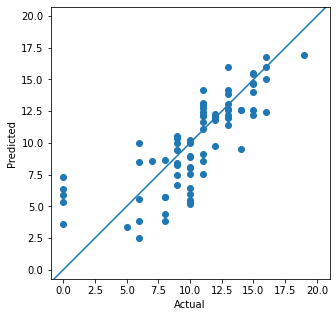

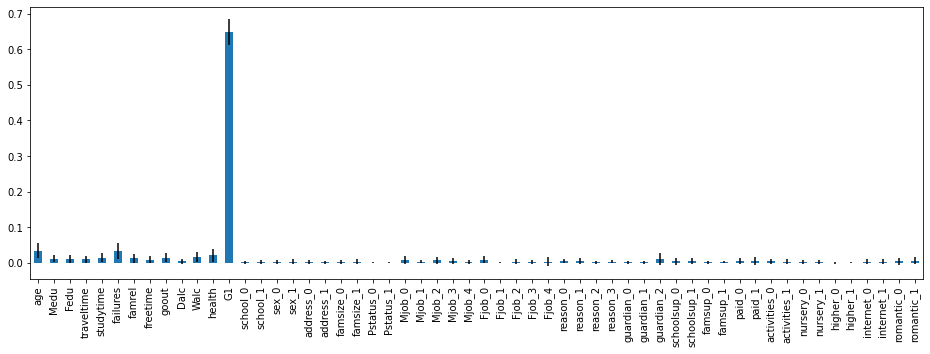

In [64]:
rdg_mat = RandomForestRegressor()
rdg_mat.fit(mat_train_x.drop(columns=['absences']), mat_train_y)
mat_predict = rdg_mat.predict(mat_test_x.drop(columns=['absences']))

cv_results = cross_validate(rdg_mat, mat_train_x, mat_train_y, cv=5, scoring = 'neg_mean_squared_error')
print('CV nmse:',-cv_results['test_score'])
print(-np.mean(cv_results['test_score']))
print('Math')
report(rdg_mat.predict(mat_train_x.drop(columns=['absences'])),mat_train_y,'Train Result:')
report(mat_predict, mat_test_y,'Test Result:')
show_feature_importances(rdg_mat,mat_test_x.drop(columns=['absences']))

In [55]:
# concat to increase dataset number
def concat_g123(df):
    cut1 = df.drop(columns = ["G2","G3","Gmean"])
    cut2 = df.drop(columns = ["G1","G3","Gmean"])
    cut3 = df.drop(columns = ["G1","G2","Gmean"])
    cut4 = df.drop(columns = ["G1","G2", "G3"])
    cut1 = cut1.rename(columns={'G1':'G'})
    cut2 = cut2.rename(columns={'G2':'G'})
    cut3 = cut3.rename(columns={'G3':'G'})
    cut4 = cut4.rename(columns={'Gmean':'G'})

    #return df.drop(columns=['G1','G2','G3'])#pd.concat([cut1,cut2,cut3])
    #return pd.concat([cut1,cut2,cut3])
    return cut3#pd.concat([cut1,cut2,cut3])
    #return pd.concat([cut1,cut2,cut3,cut4])

# Predict without previous results

In [65]:
por_train, por_test = train_test_split(dum_por_data, train_size = 0.8)#, random_state = 1039)

por_train = concat_g123(por_train)
#por_train = por_train.drop(columns=['failures','Gdifference','Gzero'])
por_train = por_train.drop(columns=['Gdifference','Gzero'])
por_train_x = por_train.drop(columns=['G'])
por_train_y = por_train['G']

"""
por_test = concat_g123(por_test)
por_test = por_test.drop(columns=['failures'])
por_test_x = por_test.drop(columns=['G'])
por_test_y = por_test['G']
"""
#por_test = por_test.drop(columns=['failures'])
por_test_x = por_test.drop(columns=['G1','G2','G3','Gmean','Gdifference','Gzero'])
por_test_y = por_test['Gmean']

In [67]:
#mat_train_x, mat_test_x, mat_train_y, mat_test_y = train_test_split(mat_x, mat_y, train_size = 0.7, random_state = 1039)
mat_train, mat_test = train_test_split(dum_mat_data, train_size = 0.8)#, random_state = 1039)

mat_train  = concat_g123(mat_train)
mat_train = mat_train.drop(columns=['Gdifference','Gzero'])
mat_train_x = mat_train.drop(columns=['G'])
mat_train_y = mat_train['G']

#mat_test = concat_g123(mat_test)
#mat_test = mat_test.drop(columns=['failures'])
mat_test_x = mat_test.drop(columns=['G1','G2','G3','Gmean','Gdifference','Gzero'])
mat_test_y = mat_test['Gmean']



Portuguese
CV nmse: [7.59676538 7.43138462 8.76065481 9.64419808 8.0493767 ]
8.296475916728902
Train Result:


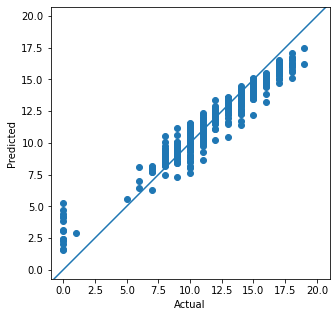

Test Result:


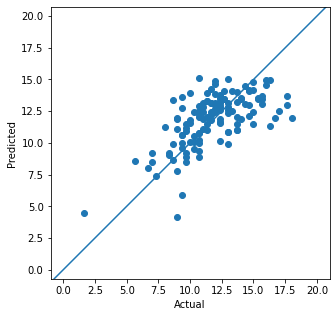

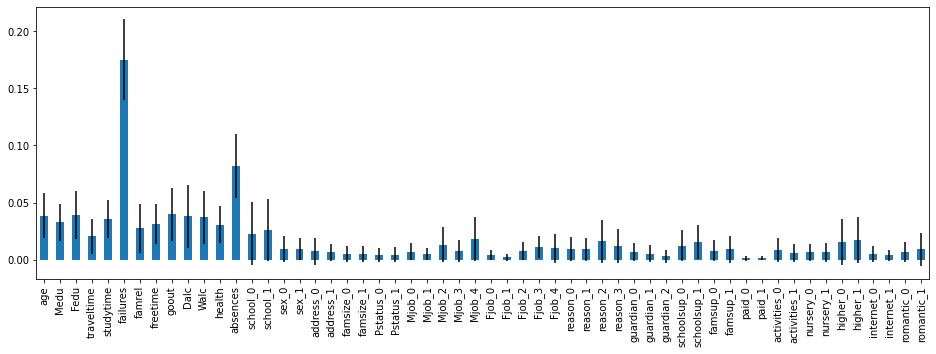

In [44]:
rdg_por = RandomForestRegressor()
rdg_por.fit(por_train_x, por_train_y)
por_predict = rdg_por.predict(por_test_x)
print('Portuguese')
cv_results = cross_validate(rdg_por, por_train_x, por_train_y, cv=5, scoring = 'neg_mean_squared_error')
print('CV nmse:',-cv_results['test_score'])
print(-np.mean(cv_results['test_score']))

report(rdg_por.predict(por_train_x),por_train_y,'Train Result:')
report(por_predict, por_test_y,'Test Result:')
show_feature_importances(rdg_por,por_train_x)

Math
CV nmse: [15.89419844 11.72779365 13.45881746 20.76150476 12.85613492]
14.939689846230157
Train Result:


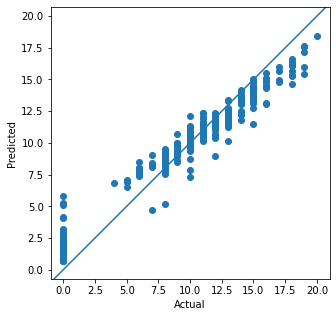

Test Result:


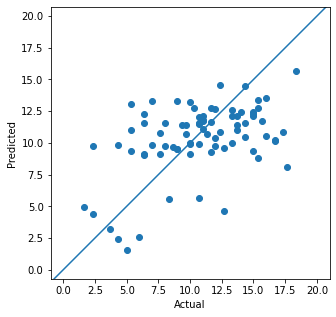

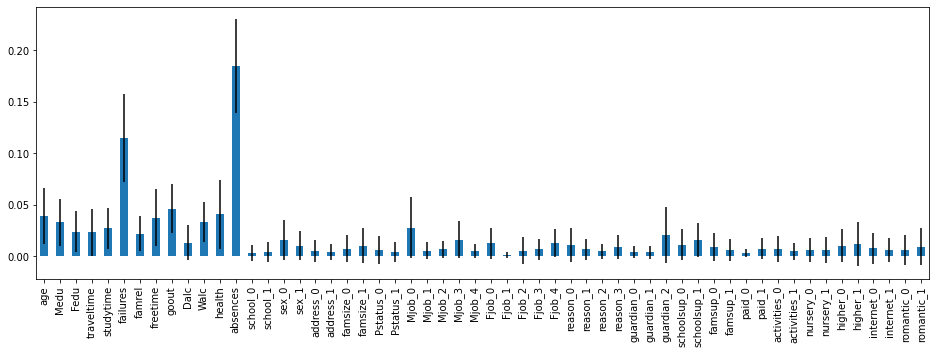

In [45]:
rdg_mat = RandomForestRegressor()
rdg_mat.fit(mat_train_x, mat_train_y)
mat_predict = rdg_mat.predict(mat_test_x)

print('Math')
cv_results = cross_validate(rdg_mat, mat_train_x, mat_train_y, cv=5, scoring = 'neg_mean_squared_error')
print('CV nmse:',-cv_results['test_score'])
print(-np.mean(cv_results['test_score']))

report(rdg_mat.predict(mat_train_x),mat_train_y,'Train Result:')
report(mat_predict, mat_test_y,'Test Result:')
show_feature_importances(rdg_mat,mat_train_x)

Math
CV nmse: [16.33397969 17.77654286 20.26108254 19.2148873  18.99096984]
18.51549244543651
Train Result:


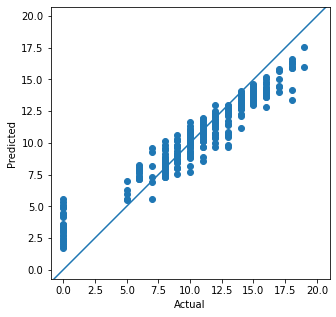

Test Result:


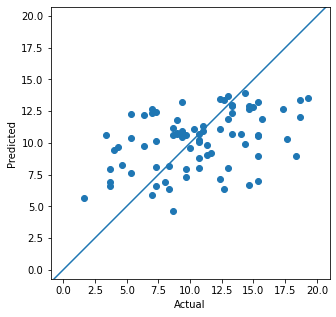

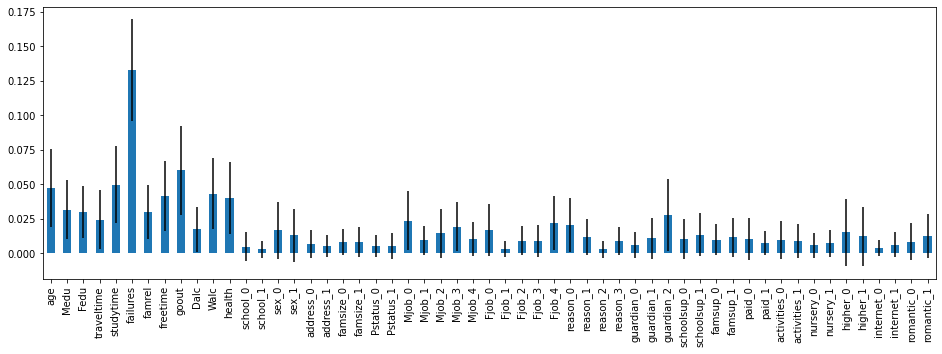

In [68]:

mat_train_x = mat_train_x.drop(columns=['absences'])
mat_test_x = mat_test_x.drop(columns=['absences'])
rdg_mat = RandomForestRegressor()
rdg_mat.fit(mat_train_x, mat_train_y)
mat_predict = rdg_mat.predict(mat_test_x)

print('Math')
cv_results = cross_validate(rdg_mat, mat_train_x, mat_train_y, cv=5, scoring = 'neg_mean_squared_error')
print('CV nmse:',-cv_results['test_score'])
print(-np.mean(cv_results['test_score']))

report(rdg_mat.predict(mat_train_x),mat_train_y,'Train Result:')
report(mat_predict, mat_test_y,'Test Result:')
show_feature_importances(rdg_mat,mat_train_x)

# Classification

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, accuracy_score
def evaluate(y,y_p,ytrain=None,ytrain_p=None):
    #f1=f1_score(y, y_p)
    #pre=precision_score(y, y_p)
    #acc=accuracy_score(y, y_p)
    #print(f1*.4+pre*.3+acc*.3)
    #print(classification_report(y, y_p))
    
    if ytrain is not None:
        cnf=confusion_matrix(ytrain, ytrain_p)
        print('The confusion matrix of tranning set')
        sns.heatmap(cnf, square=True, annot=True, fmt='d', cbar=False)
        plt.show()
    
    cnf=confusion_matrix(y, y_p)
    print('The confusion matrix of testing set')
    sns.heatmap(cnf, square=True, annot=True, fmt='d', cbar=False)
    plt.show()
    #plt.xlabel('true label')
    #plt.ylabel('predicted label');

In [47]:
grade_mat_data = dum_mat_data.copy()
grade_por_data = dum_por_data.copy()

def getlevel(df,mean,std,bins=3):
    level=[]
    if bins==3:
        for i in range(len(df)):
            #if df['Gmean'][i]<mean-1.7*std:level.append(0)
            if df['Gmean'][i]<mean-0.5*std:level.append(0)
            elif df['Gmean'][i]<mean+0.5*std:level.append(1)
            #elif df['Gmean'][i]<mean+1.7*std:level.append(3)
            #elif df['Gmean'][i]<=mean+2*std:level.append(4)
            else :level.append(2)
            
    if bins==5:
        for i in range(len(df)):
            if df['Gmean'][i]<mean-1.7*std:level.append(0)
            elif df['Gmean'][i]<mean-0.5*std:level.append(1)
            elif df['Gmean'][i]<mean+0.5*std:level.append(2)
            elif df['Gmean'][i]<mean+1.7*std:level.append(3)
            else :level.append(4)
    return level


In [48]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

def train_predict():
    #preparing datasets
    por_x = grade_por_data.drop(columns = ['G1','G2','G3', 'Gmean','Gdifference','Gzero','level'])
    por_y = grade_por_data['level']
    por_train_x, por_test_x, por_train_y, por_test_y = train_test_split(por_x, por_y, train_size = 0.8, random_state = 1039)


    mat_x = grade_mat_data.drop(columns = ['G1',"G2","G3", "Gmean",'Gdifference','Gzero','level'])
    mat_y = grade_mat_data['level']
    mat_train_x, mat_test_x, mat_train_y, mat_test_y = train_test_split(mat_x, mat_y, train_size = 0.8, random_state = 1039)

    # Portuguese
    rf = RandomForestClassifier().fit(por_train_x, por_train_y)
    rf = BalancedRandomForestClassifier().fit(por_train_x, por_train_y)
    por_predict = rf.predict(por_test_x)
    print("Portuguese")
    evaluate(por_test_y,por_predict,por_train_y,rf.predict(por_train_x))
    show_feature_importances(rf,por_train_x)
    
    # Math
    rf = RandomForestClassifier().fit(mat_train_x, mat_train_y)
    rf = BalancedRandomForestClassifier().fit(mat_train_x, mat_train_y)
    mat_predict = rf.predict(mat_test_x)
    print("Math")
    evaluate(mat_test_y,mat_predict,mat_train_y,rf.predict(mat_train_x))
    show_feature_importances(rf,mat_train_x)

Portuguese
The confusion matrix of tranning set


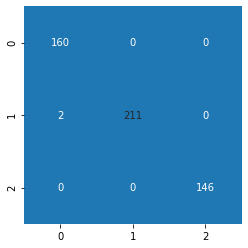

The confusion matrix of testing set


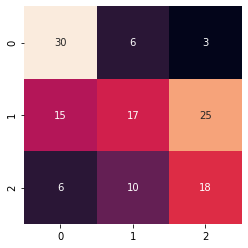

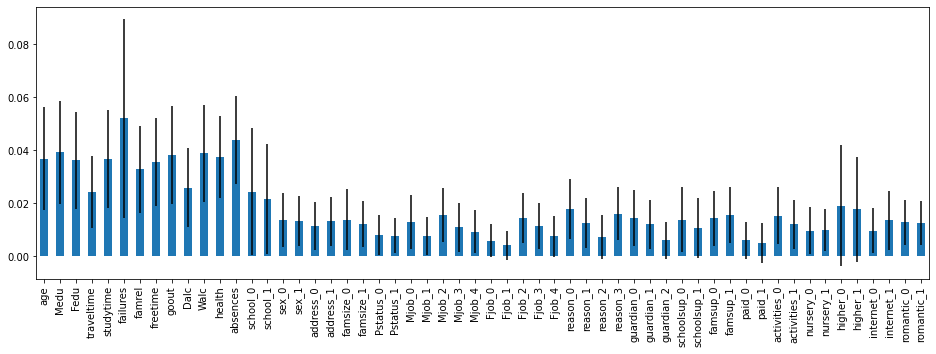

Math
The confusion matrix of tranning set


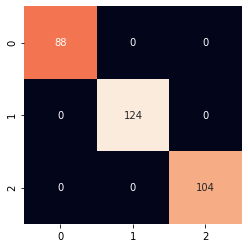

The confusion matrix of testing set


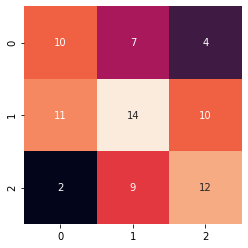

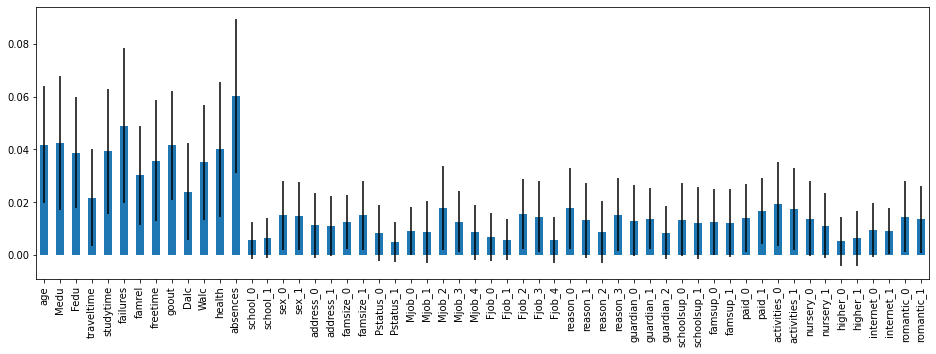

In [49]:
grade_mat_data['level']=getlevel(grade_mat_data,10.679325,3.692103)
grade_por_data['level']=getlevel(grade_por_data,11.625064,2.831177)
grade_mat_data['level'].hist(bins=(0,1,2,3))
train_predict()

Portuguese
The confusion matrix of tranning set


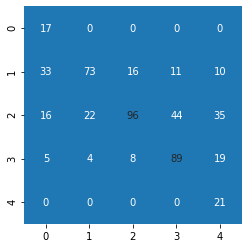

The confusion matrix of testing set


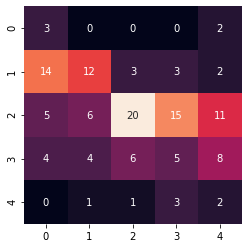

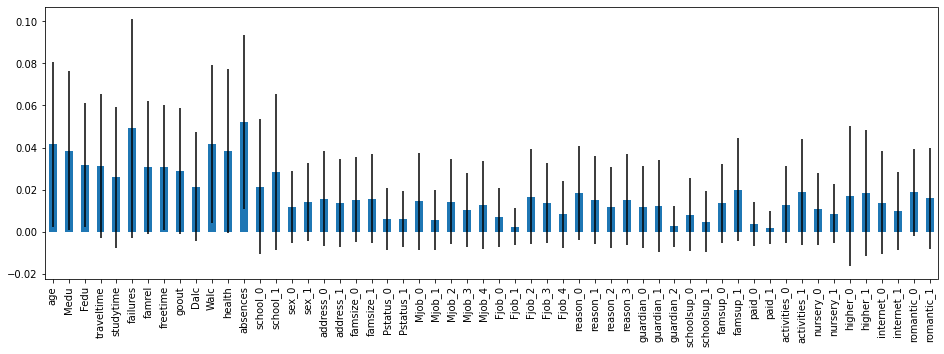

Math
The confusion matrix of tranning set


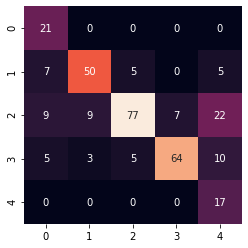

The confusion matrix of testing set


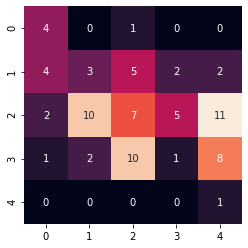

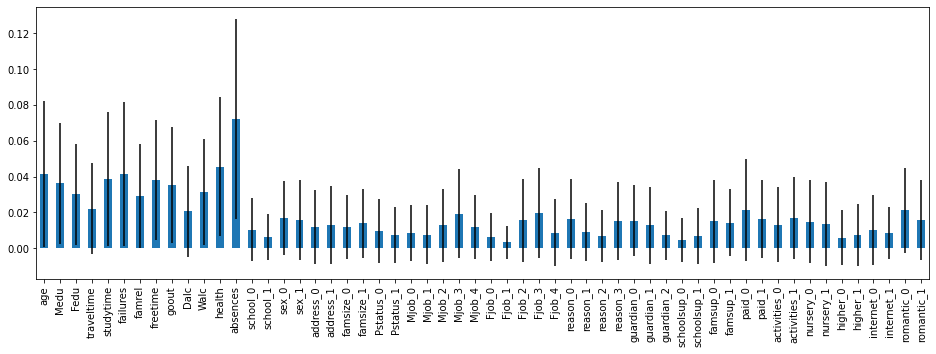

In [50]:
grade_mat_data['level']=getlevel(grade_mat_data,10.679325,3.692103,bins=5)
grade_por_data['level']=getlevel(grade_por_data,11.625064,2.831177,bins=5)
grade_mat_data['level'].hist(bins=(0,1,2,3,4,5))
train_predict()